In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = "./dataset/training/"
valid_path = "./dataset/validation/"

In [3]:
# useful for getting number of output classes
folders = glob('./dataset/training/*')
folders

['./dataset/training\\1Hundrednote',
 './dataset/training\\2Hundrednote',
 './dataset/training\\2Thousandnote',
 './dataset/training\\5Hundrednote',
 './dataset/training\\Fiftynote',
 './dataset/training\\Tennote',
 './dataset/training\\Twentynote']

In [4]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the DenseNet121 model pretrained on ImageNet
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training
for layer in base_model.layers:
    layer.trainable = False

# Create a new model
Classifier = Sequential()

# Add the DenseNet121 model as the base
Classifier.add(base_model)

# Add additional layers
Classifier.add(Flatten())
Classifier.add(Dense(units=128, activation='relu'))
Classifier.add(Dense(units=7, activation='softmax'))

# Print the model summary
Classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 dense_1 (Dense)             (None, 7)                 903       
                                                                 
Total params: 13,461,063
Trainable params: 6,423,559
Non-trainable params: 7,037,504
_________________________________________________________________


In [5]:
# tell the model what cost and optimization method to use
Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

In [7]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3173 images belonging to 7 classes.


In [8]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 7 classes.


In [ ]:
# fit the model
from PIL import _imaging
from PIL import Image
import PIL
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10
)

In [33]:
r.history

{'loss': [0.15316209197044373,
  0.11891791969537735,
  0.13241003453731537,
  0.1076807901263237,
  0.18092580139636993,
  0.12485690414905548,
  0.11308904737234116,
  0.1050574854016304,
  0.10158677399158478,
  0.0957876443862915],
 'accuracy': [0.9473684430122375,
  0.9606050848960876,
  0.9520958065986633,
  0.9643869996070862,
  0.940119743347168,
  0.9571383595466614,
  0.9643869996070862,
  0.9653325080871582,
  0.9669082760810852,
  0.9681689143180847],
 'val_loss': [0.514796793460846,
  0.4818436801433563,
  0.4172367751598358,
  0.41694825887680054,
  0.3978370428085327,
  0.5362005829811096,
  0.42163002490997314,
  0.3813878893852234,
  0.3647712171077728,
  0.420315682888031],
 'val_accuracy': [0.8698412775993347,
  0.8920634984970093,
  0.9142857193946838,
  0.8857142925262451,
  0.9142857193946838,
  0.879365086555481,
  0.8888888955116272,
  0.8952381014823914,
  0.9111111164093018,
  0.9142857193946838]}

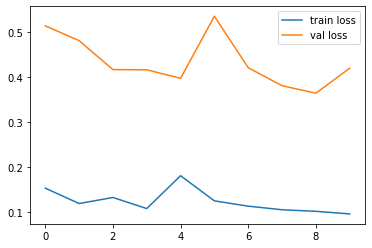

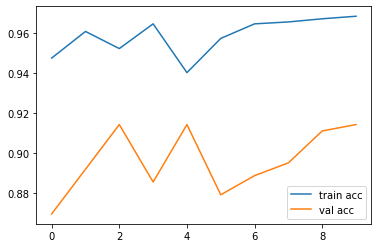

In [34]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [35]:
# save it as a h5 file
Classifier.save('classifiers/currency_classifier.h5')

In [16]:
y_pred = Classifier.predict(test_set)

In [17]:
y_pred

array([[8.92726122e-04, 5.57657472e-07, 9.98820961e-01, ...,
        3.01655155e-06, 7.29206022e-07, 2.75648665e-04],
       [3.70116942e-02, 1.85777171e-04, 9.57178593e-01, ...,
        6.33323449e-04, 5.79289976e-04, 3.42378253e-03],
       [2.11774779e-04, 3.57247955e-05, 4.39607923e-08, ...,
        1.23325095e-01, 8.76384854e-01, 3.17878075e-05],
       ...,
       [1.67257525e-03, 9.50790491e-06, 1.79413578e-03, ...,
        6.93622205e-05, 2.21232250e-02, 9.74331200e-01],
       [8.58767817e-05, 1.44771347e-03, 3.42473411e-10, ...,
        2.76276587e-05, 9.98356640e-01, 8.20967252e-05],
       [3.43255606e-03, 3.28321097e-04, 1.07860532e-09, ...,
        2.42847382e-05, 9.96153891e-01, 6.06468275e-05]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [19]:
y_pred

array([2, 2, 5, 6, 5, 0, 2, 4, 0, 2, 2, 1, 2, 4, 5, 3, 0, 3, 6, 4, 1, 5,
       6, 3, 0, 3, 5, 5, 5, 0, 3, 0, 1, 6, 4, 2, 5, 6, 1, 6, 1, 6, 2, 6,
       1, 5, 1, 2, 2, 2, 0, 6, 5, 4, 0, 6, 4, 4, 4, 0, 3, 6, 6, 5, 0, 5,
       1, 5, 1, 0, 0, 0, 4, 2, 6, 4, 4, 5, 3, 3, 0, 6, 2, 2, 1, 3, 5, 3,
       3, 4, 0, 2, 6, 5, 6, 5, 5, 0, 3, 0, 3, 3, 2, 3, 1, 5, 1, 0, 3, 1,
       4, 1, 0, 1, 6, 1, 3, 4, 4, 0, 2, 6, 3, 1, 4, 6, 2, 3, 1, 6, 5, 1,
       6, 6, 5, 2, 2, 1, 5, 6, 0, 3, 3, 5, 6, 6, 4, 2, 1, 0, 3, 5, 0, 6,
       6, 2, 5, 4, 4, 2, 3, 5, 5, 2, 2, 5, 6, 5, 3, 3, 1, 6, 3, 4, 2, 2,
       2, 1, 1, 4, 0, 1, 1, 1, 5, 4, 5, 3, 4, 1, 3, 2, 4, 3, 5, 6, 3, 4,
       0, 0, 1, 4, 1, 5, 2, 2, 5, 3, 5, 5, 6, 6, 3, 5, 2, 1, 6, 4, 2, 0,
       0, 1, 6, 0, 1, 0, 3, 4, 4, 4, 4, 2, 0, 5, 2, 3, 1, 2, 6, 3, 2, 0,
       2, 2, 3, 5, 2, 6, 6, 5, 0, 5, 1, 6, 6, 5, 4, 6, 2, 0, 1, 1, 2, 3,
       5, 1, 3, 5, 0, 5, 4, 0, 1, 0, 3, 4, 5, 4, 6, 2, 5, 0, 6, 2, 5, 1,
       0, 2, 4, 6, 3, 4, 5, 3, 4, 3, 4, 0, 6, 4, 4,

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('./DenseNetModel_Classifier.h5')

In [22]:
img=image.load_img('./dataset/test/100__415.jpg',target_size=(224,224))

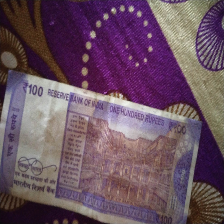

In [23]:
img

In [24]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

In [25]:
result = Classifier.predict(test_image)
result

array([[1.0000000e+00, 3.6167253e-21, 1.6529178e-12, 3.4386245e-18,
        7.8059013e-19, 2.2460171e-11, 1.8449444e-16]], dtype=float32)

In [26]:
a=np.argmax(model.predict(test_image), axis=1)

In [27]:
if a==0:
    print("100")
elif(a==1):
    print("200")
elif(a==2):
    print("2000")
elif(a==3):
    print("500")
elif(a==4):
    print("50")
elif(a==5):
    print("10")
elif(a==6):
    print("20")

100
